In [7]:
import re
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
data=pd.read_csv(r'New_DataV2.csv',header=0)
data

,Unnamed: 0,name,sweet,vanilla,smokey,chacho,sherry,cereals,fruit,spices,green,Old,flower,smooth,alcohol,rough,balance,salty
0,0,Old Pulteney 21 Year Old,1,2,3,1,0,1,3,2,0,0,0,5,0,0,0,0
1,1,Glenkinchie 12 Year Old,82,4,42,6,2,18,100,14,19,6,21,109,29,11,8,1
2,2,Unnamed: 3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,"hat mor""",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,Lagavulin 16 Year Old,23,19,312,11,11,3,12,21,2,6,1,50,29,4,11,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,434,Old Forester Bourbon,8,4,0,4,0,4,8,13,2,9,0,10,5,1,0,0
435,435,Writers Tears Cask Strength 2017 Release,0,0,0,3,0,0,6,5,0,0,0,2,0,0,0,0
436,436,Hakushu The Hakushu Single Malt Whisky Distill...,1,2,6,0,0,0,6,4,2,0,0,3,0,0,0,0
437,437,Wyoming Whiskey Barrel Strength,5,1,1,1,0,0,1,3,0,1,0,0,0,0,0,0


In [5]:
data = data.drop(['name'], axis=1)
data = data.drop(['Unnamed: 0'], axis = 1)

In [6]:
data

,sweet,vanilla,smokey,chacho,sherry,cereals,fruit,spices,green,Old,flower,smooth,alcohol,rough,balance,salty
0,1,2,3,1,0,1,3,2,0,0,0,5,0,0,0,0
1,82,4,42,6,2,18,100,14,19,6,21,109,29,11,8,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,23,19,312,11,11,3,12,21,2,6,1,50,29,4,11,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,8,4,0,4,0,4,8,13,2,9,0,10,5,1,0,0
435,0,0,0,3,0,0,6,5,0,0,0,2,0,0,0,0
436,1,2,6,0,0,0,6,4,2,0,0,3,0,0,0,0
437,5,1,1,1,0,0,1,3,0,1,0,0,0,0,0,0


In [10]:
mu = data.mean()
std = data.std()
z_score_normalized = (data - mu) / std
print(z_score_normalized)
type(z_score_normalized)

        sweet   vanilla     smokey    chacho    sherry   cereals     fruit  \
0   -0.402658 -0.003768  -0.173620 -0.230355 -0.302983 -0.132630 -0.228072   
1    7.197193  0.468870   1.278530  0.956570  0.586713  2.719878  9.247045   
2   -0.496483 -0.476407  -0.285324 -0.467741 -0.302983 -0.300425 -0.521117   
3   -0.496483 -0.476407  -0.285324 -0.467741 -0.302983 -0.300425 -0.521117   
4    1.661499  4.013658  11.331881  2.143496  4.590346  0.202959  0.651062   
..        ...       ...        ...       ...       ...       ...       ...   
434  0.254119  0.468870  -0.285324  0.481800 -0.302983  0.370753  0.260336   
435 -0.496483 -0.476407  -0.285324  0.244415 -0.302983 -0.300425  0.064973   
436 -0.402658 -0.003768  -0.061916 -0.467741 -0.302983 -0.300425  0.064973   
437 -0.027357 -0.240087  -0.248090 -0.230355 -0.302983 -0.300425 -0.423435   
438 -0.215007 -0.476407  -0.285324 -0.230355 -0.302983 -0.300425 -0.521117   

       spices      green       Old     flower    smooth   alcoh

pandas.core.frame.DataFrame

In [12]:
a = z_score_normalized.values
a

array([[-4.02658128e-01, -3.76818796e-03, -1.73620247e-01, ...,
        -4.24489572e-01, -4.28034999e-01, -2.13762794e-01],
       [ 7.19719345e+00,  4.68870245e-01,  1.27853034e+00, ...,
         5.82508404e+00,  3.45635497e+00,  1.60109184e-01],
       [-4.96483456e-01, -4.76406621e-01, -2.85324139e-01, ...,
        -4.24489572e-01, -4.28034999e-01, -2.13762794e-01],
       ...,
       [-4.02658128e-01, -3.76818796e-03, -6.19163559e-02, ...,
        -4.24489572e-01, -4.28034999e-01, -2.13762794e-01],
       [-2.73568155e-02, -2.40087404e-01, -2.48089508e-01, ...,
        -4.24489572e-01, -4.28034999e-01, -2.13762794e-01],
       [-2.15007472e-01, -4.76406621e-01, -2.85324139e-01, ...,
        -4.24489572e-01,  5.75137467e-02, -2.13762794e-01]])

findfont: Font family ['SimSum'] not found. Falling back to DejaVu Sans.


<class 'numpy.ndarray'>
labels [10  4 10 10  8 10 10  2 19  3 16  2 13  2 15 13  9 15 15  0 10 10 10 10
 10 10 10 13 10 10 10 10 10  9  0 10 10 10 15 13  0 15  0 10  9 10 10 10
 10 10 10 10  2  0 10  0  2 10 15  9 10 10 10 10 10 19  6 10 10 13 15 19
 10  0 15  0 10  0 10 10 10 10 10 10  0 10 10 10 15 10 10 10 10 13  0 10
 10 10 19  0  0 15 10  0 10 10 10  0 10  0 10 10 10 10 10 10  0 10 10 10
  9  0 10 10 10 10  2  3  2  0 10  7 10  9 10 10 15 15 10 10 10 15 10 13
 16 10 10  0 10 10 10 10 10  0  2  7  0 10  0 10 10 10  3 10 10 10 15 10
 10 10 10 10  8 10 10 10  0 10 10 10 10 10 10 10 10 10 10  0 10 10  2 10
 10 10  0 10 10 10  0 10 10 10 10  0 10 10 10 10 10 10 10 10 10 15 15 10
 10 10 10 10 15 10  2 14  2 10  0 13 11  2 13  0  2  0  2  0  0 10 10  5
 11  9  1  2  0  0 11 14  2 10 14 16 10  0  0  1  2 18 10  2  0  2  7  2
  0  2  2  0 17 10 10  0 14  0  0  2  0  0 10  0  0 10  2 10 10 14 16 10
 10  0 10 14 15 10 10  0 10  0 10 10 18  2 10 10 10  2 10 10 10 10 10 10
 11 10  0 10 10  0 1

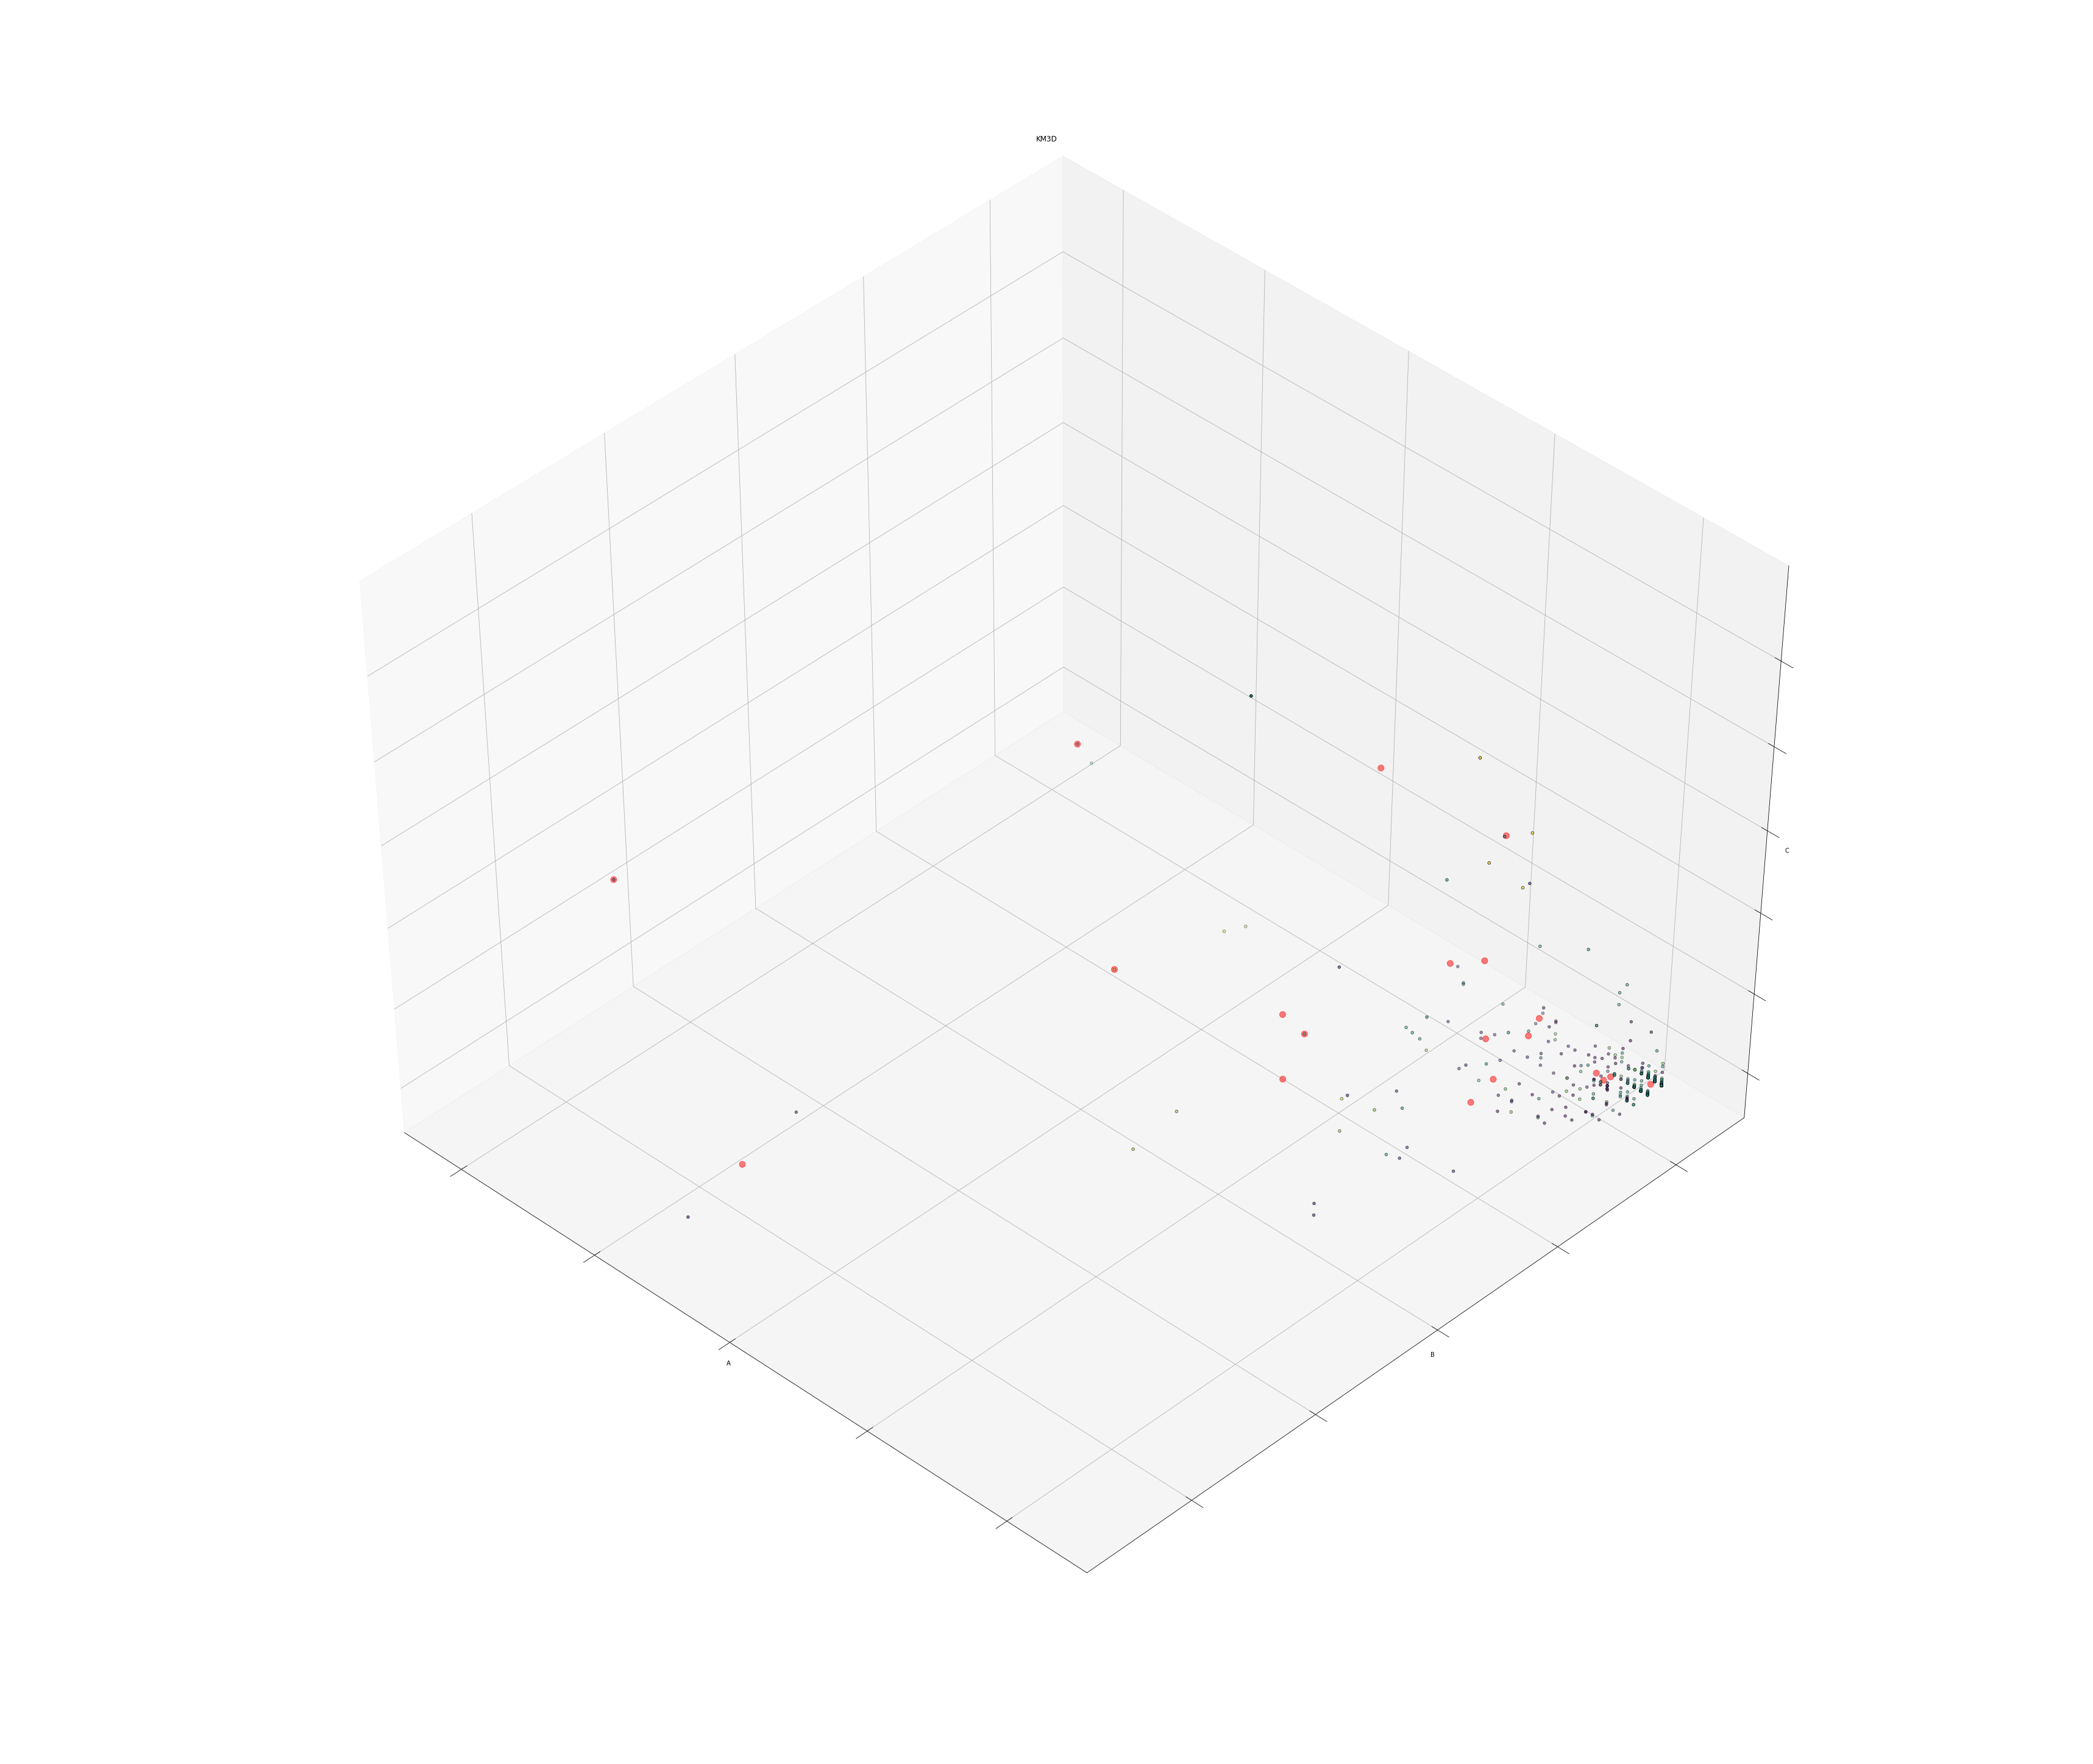

In [13]:
np.random.seed(5)

X = a
model = KMeans(n_clusters=20)
model.fit(X)
labels = model.labels_
print(type(labels))
print("labels", labels, labels.shape)

fig = plt.figure('f0', figsize=(50, 40))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels.astype(np.float), edgecolors='k')

C = model.cluster_centers_
ax.scatter(C[:, 0], C[:, 1], C[:, 2], c='red', s=100, alpha=0.5)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

ax.set_xlabel('A', fontproperties="SimSum")
ax.set_ylabel('B', fontproperties="SimSum")
ax.set_zlabel('C', fontproperties="SimSum")
ax.set_title("KM3D")
ax.dist = 12
plt.show()